## Assignment: Example Econometrics Experiment
#### Please read through the notebook and replace any #todos
#### Please also be sure to fill out the markdown cell at the end of this notebook with your response

In [1]:
# As always, we begin by importing our packages at the top of our notebook

import pandas
from sklearn.preprocessing import StandardScaler

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Let's use .tail() to view a sample of our data and make sure it loaded as expected

df = pandas.read_csv('CP3_2_data.csv',parse_dates=True,index_col=0)
df.tail(4)

,Ticker,Fiscal Period,Fiscal Year,Report Date,Revenue,"Property, Plant & Equipment, Net",Adjusted Close
Publish Date,,,,,,,
2018-03-01,DLR,FY,2017,2017-12-31,2457928000,13666559000,93.5452
2019-02-25,DLR,FY,2018,2018-12-31,3046478000,14894043000,103.0966
2020-03-02,DLR,FY,2019,2019-12-31,3209241000,14230575000,132.4181
2021-03-01,DLR,FY,2020,2020-12-31,3903609000,22263017000,138.7966


In [3]:
# Here we will use the .columns property of our DataFrame to print out the columns from our data.

df.columns

Index(['Ticker', 'Fiscal Period', 'Fiscal Year', 'Report Date', 'Revenue',
       'Property, Plant & Equipment, Net', 'Adjusted Close'],
      dtype='object')

In [4]:
# Objective:
# Select the following collumns for your data frame:
# 'Revenue','Property, Plant & Equipment, Net' and 'Adjusted Close'

econ_df = df[['Revenue','Property, Plant & Equipment, Net' ,'Adjusted Close']]
econ_df

,Revenue,"Property, Plant & Equipment, Net",Adjusted Close
Publish Date,,,
2010-02-05,637142000,3148034000,31.8296
2011-02-25,865401000,4560468000,37.5782
2012-02-28,1062710000,5212325000,48.4772
2013-02-28,1279067000,7522844000,46.6641
2014-03-03,1482259000,8298964000,39.7197
2015-03-02,1616438000,8096362000,52.0151
2016-02-29,1763336000,8651466000,64.8144
2017-03-01,2142213000,8878625000,91.3527
2018-03-01,2457928000,13666559000,93.5452


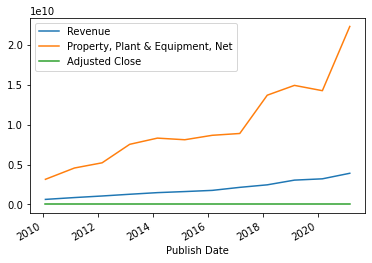

In [5]:
# Let's visualize our data

econ_df.plot()

In [6]:
# We can take a look at our DateTimeIndex from our DataFrame using the .index property.

econ_df.index

DatetimeIndex(['2010-02-05', '2011-02-25', '2012-02-28', '2013-02-28',
               '2014-03-03', '2015-03-02', '2016-02-29', '2017-03-01',
               '2018-03-01', '2019-02-25', '2020-03-02', '2021-03-01'],
              dtype='datetime64[ns]', name='Publish Date', freq=None)

               Revenue  Property, Plant & Equipment, Net  Adjusted Close
Publish Date                                                            
2010-02-05   -1.352509                         -1.315852       -1.159932
2011-02-25   -1.118335                         -1.042692       -0.999371
2012-02-28   -0.915912                         -0.916625       -0.694958
2013-02-28   -0.693948                         -0.469779       -0.745598


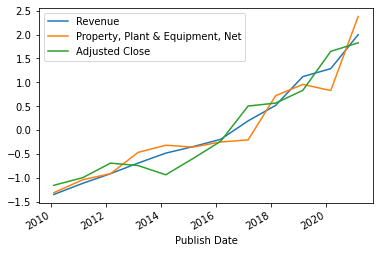

In [7]:
# In the above plot, it was a bit difficult to see relationships 
# in our data due to the differences in scale.
# Let's normalize our data using a Z or Standard transform.

scaler = StandardScaler()

scaled_df = pandas.DataFrame(
    scaler.fit_transform(econ_df), 
    columns=econ_df.columns,
    index=econ_df.index)

print(scaled_df.head(4))

scaled_df.plot()

Much better!

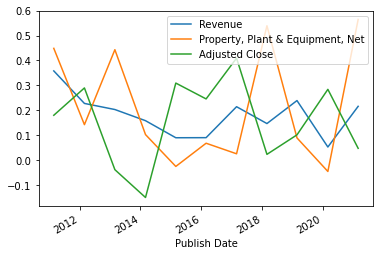

In [8]:
# Objective:
# Visualize an alternative plot using the function "pct_change"

econ_df.pct_change().dropna().plot()

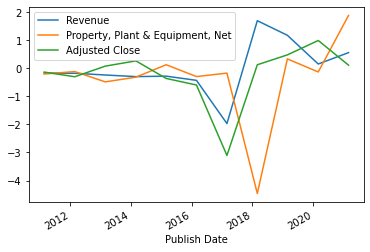

In [9]:
# How does this look with our rescaled data?
scaled_df.pct_change().dropna().plot()

In [10]:
# Here we will make use of the rename method from our DataFrame
# to change some collumn names. We will be making use of a 
# stanrded model syntax borrowed from the programming language R.

# Don't worry if it's new to you. But we can't have spaces in our 
# collumn names

relabeled_df = df.rename(columns={
    'Property, Plant & Equipment, Net':'ppe',
    'Adjusted Close':'adjusted_close',
    'Revenue':'revenue'})

In [11]:
# Let's quickly check our new DataFrame
relabeled_df.tail(3)

,Ticker,Fiscal Period,Fiscal Year,Report Date,revenue,ppe,adjusted_close
Publish Date,,,,,,,
2019-02-25,DLR,FY,2018,2018-12-31,3046478000,14894043000,103.0966
2020-03-02,DLR,FY,2019,2019-12-31,3209241000,14230575000,132.4181
2021-03-01,DLR,FY,2020,2020-12-31,3903609000,22263017000,138.7966


#### Time for some modeling!

The first model is completed for you, work to complete the second one.

In [12]:
plant_and_property_model = ols("adjusted_close ~ ppe ", data = relabeled_df).fit()

# Objective:
# Use the above line of code as a guide, and complete the econometric model for 'revenue'

revenue_model = ols("adjusted_close ~ revenue ", data = relabeled_df).fit()

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     49.28
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           3.63e-05
Time:                        19:17:02   Log-Likelihood:                -49.286
No. Observations:                  12   AIC:                             102.6
Df Residuals:                      10   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5303     10.086      1.044      0.3

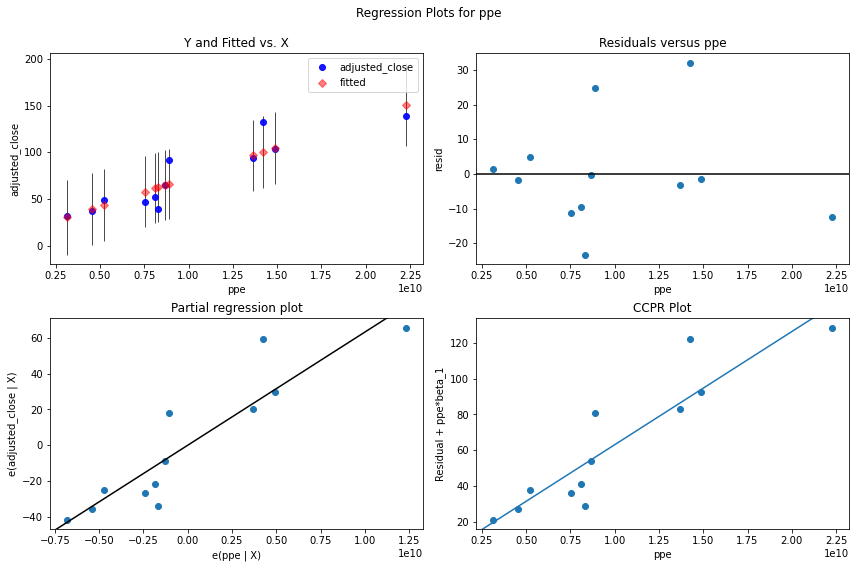

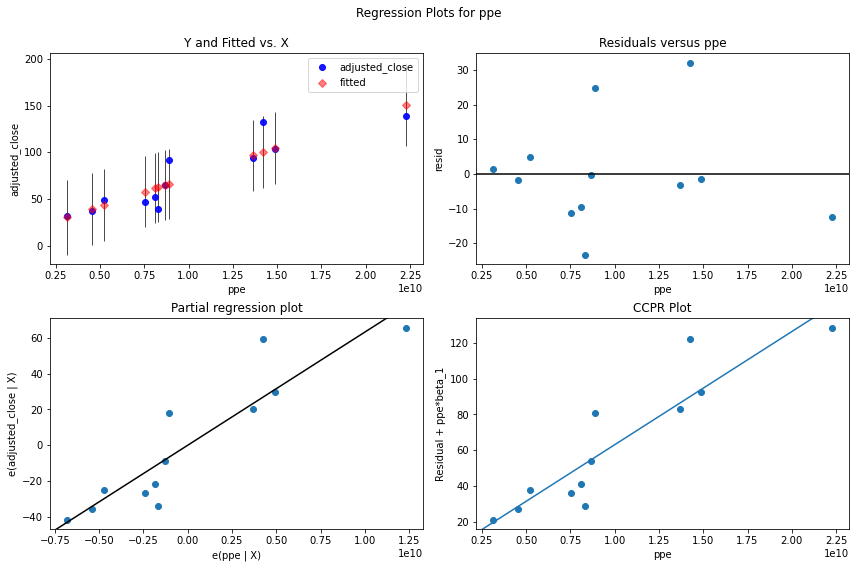

In [13]:
# In one cell we will print our summary and plot some figures below.
# Don't worry about the new package for now. But keep it in mind for the future.

print(plant_and_property_model.summary())

sm.graphics.plot_regress_exog(plant_and_property_model, 'ppe', fig=plt.figure(figsize=(12,8)))

                            OLS Regression Results                            
Dep. Variable:         adjusted_close   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     160.2
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           1.77e-07
Time:                        19:17:09   Log-Likelihood:                -42.959
No. Observations:                  12   AIC:                             89.92
Df Residuals:                      10   BIC:                             90.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6742      6.152      0.597      0.5

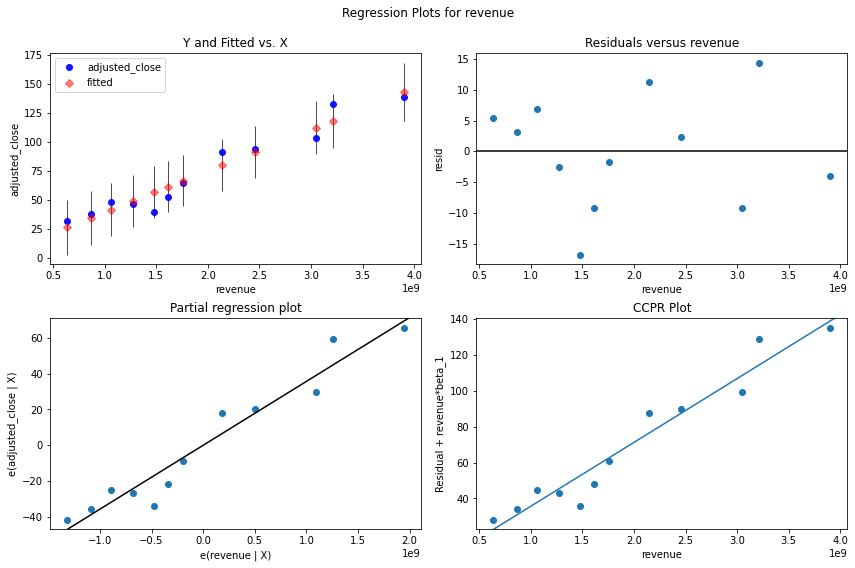

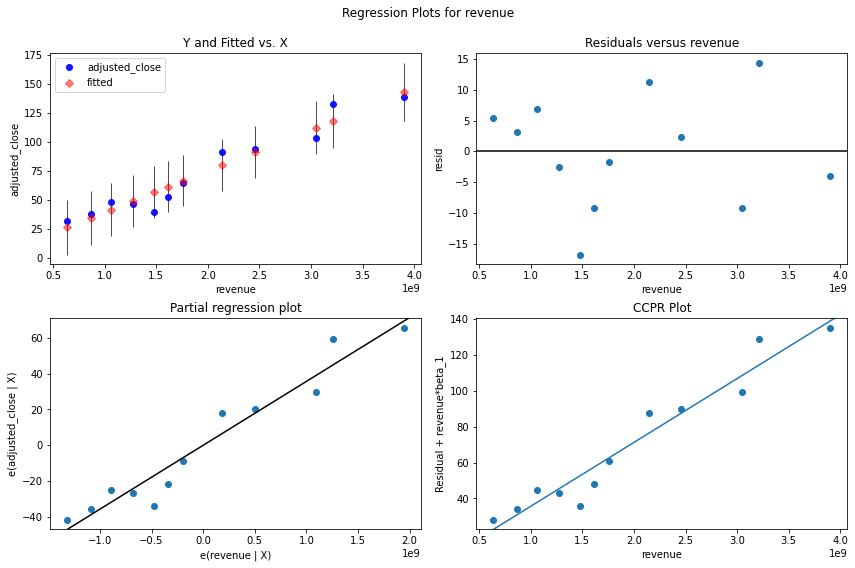

In [14]:
# Again for the next model
print(revenue_model.summary())

sm.graphics.plot_regress_exog(revenue_model, 'revenue', fig=plt.figure(figsize=(12,8)))

In [ ]:
# Final Objective:

# In the markdown cell bellow (double click to edit), 
# write your response for which model you think best explains the Adjusted Close prices
# for Digital Realty Trust. Does the equity in the form of Plant, Property and Equipment (PPE)
# best explain our data, or does Revenue? Why? Please refer to the above analyses and/or figures.

<< In my opinion, its "Revenue Data" best explains the Adjusted Close prices and does not overlap each other, 
Also its have the best value for the R-squared model. >>